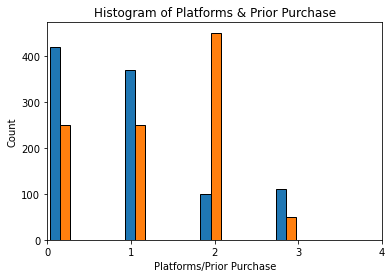

Gaussian Model score: 0.6535
Categorical Model score: 0.7034999999999999
Binomial Model score: 0.6880000000000001
Multinomial Model score: 0.5145000000000001
Complement Model score: 0.5005
Fitting 20 folds for each of 5 candidates, totalling 100 fits
{'min_categories': 2}
0.7034999999999999
{'mean_fit_time': array([0.00397069, 0.00457033, 0.00413642, 0.00373988, 0.00437984]), 'std_fit_time': array([0.00234112, 0.00252127, 0.00254554, 0.00141325, 0.00222061]), 'mean_score_time': array([0.00080096, 0.00123911, 0.00130643, 0.00077257, 0.00108514]), 'std_score_time': array([0.00017151, 0.00105688, 0.00101793, 0.00018839, 0.00090951]), 'param_min_categories': masked_array(data=[2, 12, 20, 32, 46],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'min_categories': 2}, {'min_categories': 12}, {'min_categories': 20}, {'min_categories': 32}, {'min_categories': 46}], 'split0_test_score': array([0.695, 0.695, 0.695, 0.695, 0.695]

In [6]:
#Importing necessary packages for the code.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

#Importing data into and converting it accordingly.
#To assist with the combining of the two columns, the data will be encoded with a pre-processor.
from sklearn import preprocessing

#Data from 'Purchase_Data' is moved into a dataframe and subsequently moved into arrays for
#further operations. The data is also reshaped to help with classifier operations.
purchase=pd.read_excel("Purchase_Data.xls")
platform=np.array(purchase.platform)
platform = platform.reshape(-1,1)
prior=np.array(purchase.Prior_purchase)
prior = prior.reshape(-1,1)
#Creating labelEncoder
le = preprocessing.LabelEncoder()
#Converting string labels into numbers.
platform_encoded=le.fit_transform(platform)
prior_encoded=le.fit_transform(prior)
X = list(zip(platform_encoded,prior_encoded))
X=np.asarray(X)
y = np.array(purchase.label)
y=np.ravel(y)
np.random.seed(32951094)
#Plotting the histogram for the data.
plt.hist(X,edgecolor='black')
plt.xlabel('Platforms/Prior Purchase')
plt.ylabel('Count')
plt.title('Histogram of Platforms & Prior Purchase')
plt.xlim(0,4)
plt.locator_params(axis='x', integer=True)
plt.show()

#To have one small set of data will be untouched, a validation set is made as well.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,train_size=0.9)
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4,random_state=32951094)

#Testing accuracy performances of all models with cross_val_score.
GModel=GaussianNB()
CModel=CategoricalNB()
BModel=BernoulliNB()
MModel=MultinomialNB()
CoModel=ComplementNB()

scoring='accuracy'
GaussianScore = cross_val_score(GModel, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
CategoricalScore = cross_val_score(CModel, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
BinomialScore = cross_val_score(BModel, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
MScore = cross_val_score(MModel, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
CoScore = cross_val_score(CoModel, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')

print("Gaussian Model score:", GaussianScore.mean())
print("Categorical Model score:", CategoricalScore.mean())
print("Binomial Model score:", BinomialScore.mean())
print("Multinomial Model score:", MScore.mean())
print("Complement Model score:", CoScore.mean())

#Looking for the best hyperparameter to tune, to improve model performance.
model=CategoricalNB()
model.get_params()
params_NB = {'min_categories': [2,12,20,32,46]}
clf = GridSearchCV(     estimator = model,
                              param_grid=params_NB,
                              cv=cv, scoring=scoring,verbose=1,n_jobs=-1
                           )

clf.fit(X,y)
print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_)

#The hyper-parameter tuned model is now validated for accuracy on the unseen data.
model=CategoricalNB(min_categories=2)
model.fit(X,y)
m_scores = cross_val_score(model, X_valid, y_valid, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Hyper-parameter tuned Categorical model score:", m_scores.mean())

#The model is now used to be a classifier.
class1=input("Enter the platform being used: 1-Android,2-iOS,3-Windows,4-Others")
class2=input("Enter the prior purchase date:1,2,3")
independant= np.array([class1,class2])
independant=independant.reshape(1,-1)

val=clf.predict(independant)
yprob=(clf.predict_proba(independant))

print("It is predicted that the label will be",val)
print("Predicted probability of purchasing is",format(yprob[0,1]))

In [7]:
model=CategoricalNB(min_categories=2)
model.fit(X,y)
m_scores = cross_val_score(model, X_valid, y_valid, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Hyper-parameter tuned Categorical model score:", m_scores.mean())

Hyper-parameter tuned Categorical model score: 0.675


In [8]:
#The model is now used to be a classifier.
class1=input("Enter the platform being used: 1-Android,2-iOS,3-Windows,4-Others")
class2=input("Enter the prior purchase date:1,2,3")
independant= np.array([class1,class2])
independant=independant.reshape(1,-1)

val=clf.predict(independant)
yprob=(clf.predict_proba(independant))

print("It is predicted that the label will be",val)
print("Predicted probability of purchasing is",format(yprob[0,1]))

Enter the platform being used: 1-Android,2-iOS,3-Windows,4-Others1
Enter the prior purchase date:1,2,33
It is predicted that the label will be [0]
Predicted probability of purchasing is 0.310106352113829
